# Homework #2: Nicolas Acton, ECE-5714

### Problem 1
19.Let X be a continuous RV having the density $f_{x}(x)=(1/2)e^{-|x|}, \ -\infty < x < \infty $.

a. Show that $\phi_{x}(t) = 1/(1+t^{2})$

**A**  $$\phi_{x}(t) = E[e^{itx}] = \int^{\infty}_{-\infty}e^{itx}f(x)dx = \int^{\infty}_{-\infty}e^{itx}f(x)dx $$
$$ =\int^{\infty}_{-\infty}\frac{e^{itx}}{2* e^{-|x|}}dx = \frac{1}{1+t^{2}} $$

b. Use (a) and the inversion formula (19) to conclude that
$$ e^{-|x|}=\int^{\infty}_{-\infty} e^{-ixt}\frac{1}{\pi(1+t^{2})}dt $$

**B**   Inversion formula (19) states $$f_{x}(x) = \frac{1}{2\pi} \int^{\infty}_{-\infty}e^{-ixt}\phi_{x}(t)dt$$
$$ \frac{e^{-|x|}}{2} = \int^{\infty}_{-\infty} e^{-ixt}\frac{1}{2\pi(1+t^{2})}dt$$ The 2s comes out of both sides so: 
$$ e^{-|x|} = \int^{\infty}_{-\infty} e^{-ixt}\frac{1}{\pi(1+t^{2})}dt $$

c.Show by using (b) that $ e^{-|x|} = \int^{\infty}_{-\infty} e^{ixt}\frac{1}{\pi(1+t^{2})}dt $

**C** Prove by replacing t by -t 
$$ e^{-|x|} = \int^{\infty}_{-\infty} e^{-ix(-t)}\frac{1}{\pi(1+(-t)^{2})}dt $$
$$ e^{-|x|} = \int^{\infty}_{-\infty} e^{ixt}\frac{1}{\pi(1+(t)^{2})}dt $$
Because the probability density function extends equally to both $\infty$ and $-\infty$ the integration will be equivalent regardless of the sign of *t*.

20.Let X be an RV having the Cauchy density: $$ f_{x}(x) = \frac{1}{\pi(1+x^{2})}, -\infty < x < \infty $$ Show that $\phi_{x}(t) = e^{-|t|}, -\infty < t < \infty $

**20** $$\phi_{x}(t) = E[e^{itx}] = \int^{\infty}_{-\infty}e^{itx}f(x)dx = \int^{\infty}_{-\infty}e^{itx}f(x)dx $$
$$ = \int^{\infty}_{-\infty}\frac{e^{itx}}{\pi(1+x^{2})} $$

Since $ e^{-|x|} = \int^{\infty}_{-\infty} e^{ixt}\frac{1}{\pi(1+(t)^{2})}dt $ (from 19B/C) then  $ e^{-|t|} = \int^{\infty}_{-\infty} e^{ixt}\frac{1}{\pi(1+(x)^{2})}dx $

### Problem 2
Using the characteristic function, prove that the Cauchy distribution is stable under i.i.d. assumption. Without loss of generality, put the parameter of location b = 0 and the parameter of scale a = 1.

**A** A random variable is said to be stable (source: http://fs2.american.edu/jpnolan/www/stable/chap1.pdf) if its characteristic function can be written as:
$$ \phi_{x}(t;\beta, \alpha, c, \mu) = exp(it\mu - |ct|^{\alpha}(1-i\beta sgn(t)\Phi))) $$
Since $\alpha$ has been defined as 1, i.i.d. indicates that c = 1, and $\beta$ has been defined as 0, this can be simplified to:
$$ \phi_{x}(t) = e^{-|t|} $$
Coincidentally, this is equivalent to the characteristic function of a Cauchy distribution with the same parameters of $\alpha  1 $ and $ \beta = 0 $. Thus proving stability.

### Problem 3
Implement a linear congruential random generator and study the periodicity and the nonlinear dependencies that may exist among the generated sequence of numbers as the parameters a and M are changed while c is set equal to either 0 or 1. To this end, plot and investigate the patterns of the points (Xi , Yi) obtained by applying the Box-Muller transformation defined by  
$$ X_{i} = \sqrt{-2ln(U_{i})} cos(2\pi a U_{i} + 2\pi c/M) $$
$$ Y_{i} = \sqrt{-2ln(U_{i})} sin(2\pi a U_{i} + 2\pi c/M) $$  
where {Ui, i = i, ..., m} are i.i.d. sequences following a uniform distribution over (0,1).

In [22]:
# Be sure to install these packages! $ conda install "package names"
%matplotlib inline
import numpy as np
import math
import seaborn as sns
import random

def rng(a, m, c, xi, n):
    u = []
    u.append(xi)
    for i in range(1, n-1):
        x = (a*u[i-1] + c)%m
        u.append(x)
        i = i + 1
    u2 = []
    for i in range(0,n-1):
        u2.append(u[i]/m)
    return u2
        

def boxMully1(a, m, c, xi, n):
    # Define Box-Muller Method
    u1 = rng(a,m,c,xi,n)
    x = []
    for i in range(0,n-1):
        x.append(np.sqrt(-2*np.log(u1[i]))*np.cos(2*np.pi*a*u1[i] + 2*np.pi*(c/m)))
        i = i +1
    return np.array(x)

def boxMully2(a, m, c, xi, n):
    # Define Box-Muller Method
    u1 = rng(a,m,c,xi,n)
    x = []
    for i in range(0,n-1):
        x.append(np.sqrt(-2*np.log(u1[i]))*np.sin(2*np.pi*a*u1[i] + 2*np.pi*(c/m)))
        i = i +1
    return np.array(x)

def plotBoxMull(a, m, c, xi, n):
    x = boxMully1(a, m, c, xi, n)
    y = boxMully2(a, m, c, xi, n)
    # Plot using Seaborn
    sns.jointplot(x, y, kind='scatter')
    sns.plt.show()
    pass

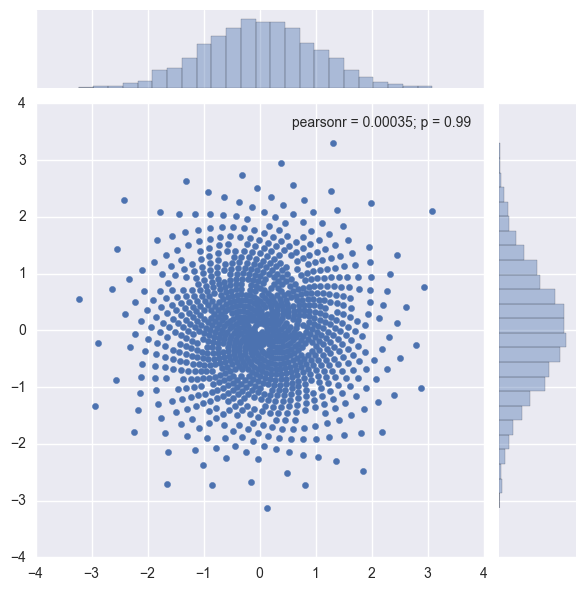

In [34]:
plotBoxMull(101, 1069, 1, 1, 1000)

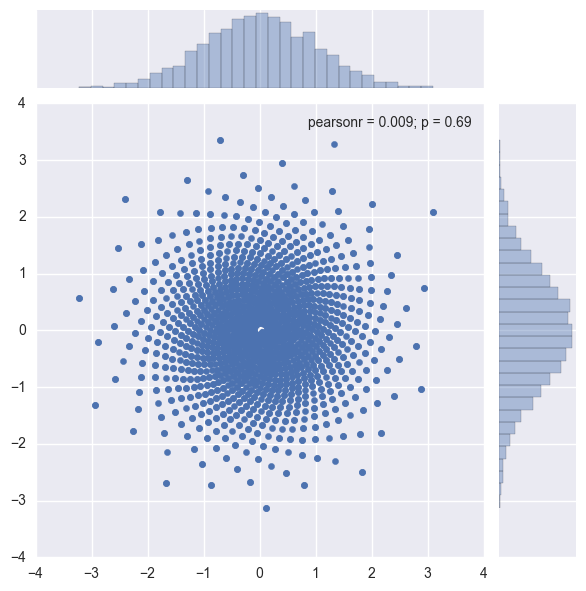

In [30]:
plotBoxMull(101, 1069, 0, 1, 2000)

### Problem 4
In the mid 1970s researchers isolated beta-endorphin, a morphinelike chemical found in the human brain, and discovered that people have higher levels of it in their blood under conditions of emotional stress. Under the presumed stress of impending surgery, most patients had a higher endorphin level. The recorded values of endorphin level 10 minutes before surgery for 19 patients are {6.5, 14.0, 13.5, 18.0, 14.5, 9.0, 18.0, 42.0, 7.5, 6.0, 25.0, 12.0, 52.0, 20.0, 16.0, 15.0, 11.5, 2.5, 2.0}

**1)** Plot and analyze the histogram of this data set. Calculate the sample mean, the sample median and the midpoint of the shortest half of the sample. Calculate the sample standard-deviation, the MAD, and S = 1.4826 LHS/2, where LHS stands for the length of the shortest half. Put $b_{m} = 1$ when calculating MAD and S.

In [173]:
from pandas import DataFrame 
import pandas as pd
import math

# Dataset for patients' endorphin levels
endoLevels = [6.5, 14.0, 13.5, 18.0, 14.5, 9.0, 18.0, 42.0, 7.5, 6.0, 25.0, 12.0, 52.0, 20.0, 16.0, 15.0, 11.5, 2.5, 2.0]
# For simplicity of analysis, it's good to sort by ascending value
endoLevels.sort()

# We'll define set size m here which will be useful later
m = len(endoLevels)

# Show data in a table (sanity check)
df = pd.DataFrame(data = endoLevels)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.0,2.5,6.0,6.5,7.5,9.0,11.5,12.0,13.5,14.0,14.5,15.0,16.0,18.0,18.0,20.0,25.0,42.0,52.0


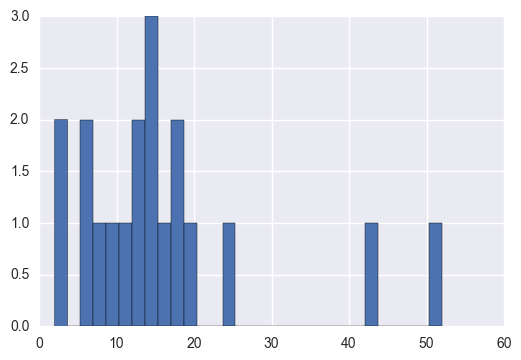

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot endorphin levels as a histogram
# Change 'bins' to make bin ranges larger or smaller
plt.hist(endoLevels, bins=30)
plt.show()

In [175]:
# Sample Mean
sampleMean = sum(endoLevels)/len(endoLevels)
print("Sample Mean is: " + str(round(sampleMean,2)))

# For later calculations, it is useful to create an array of deviations from the mean for each value.
      
diffMean = []
for i in endoLevels:
    diffMean.append((round(i-sampleMean,2)))
dataDiffMean = {'Value': endoLevels, 'diff from mean 16.05': diffMean}
dfDiffMean = pd.DataFrame(data=dataDiffMean)
dfDiffMean

Sample Mean is: 16.05


,Value,diff from mean 16.05
0,2.0,-14.05
1,2.5,-13.55
2,6.0,-10.05
3,6.5,-9.55
4,7.5,-8.55
5,9.0,-7.05
6,11.5,-4.55
7,12.0,-4.05
8,13.5,-2.55
9,14.0,-2.05


In [176]:
# Standard Deviation
## While we're on the Sample Mean, we might as well find it's estimator of scale, the standard-deviation.
## First we find variance in discrete cases
diffMeanSum= 0
for i in diffMean:
    diffMeanSum += i**2
variance = 1/(m-1) * diffMeanSum
print("Variance is: " + str(round(variance,2)))
stDev = math.sqrt(variance)
print("Sample Standard Deviation is " + str(round(stDev,2)))

Variance is: 156.47
Sample Standard Deviation is 12.51


In [177]:
# Sample Median
sampleMedian = endoLevels[9]
print("Sample Median is: " + str(sampleMedian))

Sample Median is: 14.0


In [185]:
# Median-Absolute-Deviation (MAD)
## While we're on the Sample Median, we might as well find it's estimator of scale, the MAD.
## First, we find the absolute value of ri
diffMedian = []
for i in endoLevels:
    diffMedian.append(abs((round(i-sampleMedian,2))))
## We're going to sort this list later so it's useful for later calculations to keep an unsorted version.
diffMedianUnsort = diffMedian

dataDiffMedian = {'Value': endoLevels, 'diff from median 14': diffMedian}
dfDiffMedian = pd.DataFrame(data=dataDiffMedian)
dfDiffMedian

,Value,diff from median 14
0,2.0,12.0
1,2.5,11.5
2,6.0,8.0
3,6.5,7.5
4,7.5,6.5
5,9.0,5.0
6,11.5,2.5
7,12.0,2.0
8,13.5,0.5
9,14.0,0.0


In [179]:
## We can then sort the data to find the median of these differences.
diffMedian.sort()
dfmedian = pd.DataFrame(data = diffMedian)
print("med|ri| is " + str(diffMedian))
dfmedian.T

med|ri| is [0.0, 0.5, 0.5, 1.0, 2.0, 2.0, 2.5, 4.0, 4.0, 5.0, 6.0, 6.5, 7.5, 8.0, 11.0, 11.5, 12.0, 28.0, 38.0]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.5,0.5,1.0,2.0,2.0,2.5,4.0,4.0,5.0,6.0,6.5,7.5,8.0,11.0,11.5,12.0,28.0,38.0


In [180]:
## The MAD is defined by 1.4826*bm*med|ri|; in this case, bm has been given as 1
bm = 1
mad = 1.4826*bm*diffMedian[9]
print("The MAD is " + str(round(mad,2)))

The MAD is 7.41


In [181]:
# Finding Length of the Shortest Half
## In this instance, since endoLevels is a set of m = 19, z will be 10
## Initiate values for calculation
i = 0
lengthList = []

# Print a list of lenghts between sets of z = 10
z=10

while(i < z):
    length = endoLevels[i+9] - endoLevels[i]
    print("The length between points " + str(i) + " and " + str(i+(z-1)) + " is: " + str(length))
    lengthList.append(length)
    i = i + 1

# Find the shortest half of all listed lengths and print the values where it occurs.
sh =  min(lengthList)
beginPoint = endoLevels[lengthList.index(sh)]
endPoint = endoLevels[lengthList.index(sh)+(z-1)]
print("The shortest half is " + str(sh) + " between values " + str(beginPoint) + " and " + str(endPoint))

The length between points 0 and 9 is: 12.0
The length between points 1 and 10 is: 12.0
The length between points 2 and 11 is: 9.0
The length between points 3 and 12 is: 9.5
The length between points 4 and 13 is: 10.5
The length between points 5 and 14 is: 9.0
The length between points 6 and 15 is: 8.5
The length between points 7 and 16 is: 13.0
The length between points 8 and 17 is: 28.5
The length between points 9 and 18 is: 38.0
The shortest half is 8.5 between values 11.5 and 20.0


In [182]:
## From here we can find the midpoint of the shortest half easily.
midpoint = (beginPoint + endPoint)/2
print("Midpoint of the shortest half is " + str(midpoint))

Midpoint of the shortest half is 15.75


In [195]:
# Scale based on LSH
## While on the LSH, we can find the estimator of scale for it, defined as S
S = 1.4826*bm*(sh/2)
print("The scale estimator for LSH is " + str(round(S,2)))

The scale estimator for LSH is 6.3


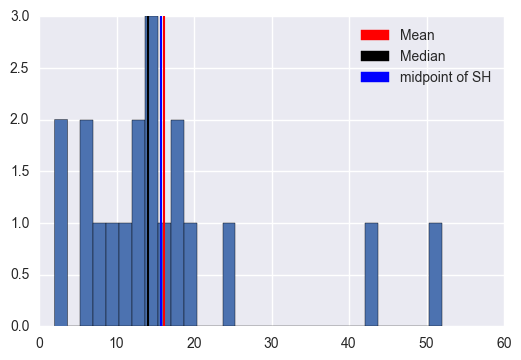

In [213]:
# Just for reference, let's replot with mean, median, and LSH shown.
import matplotlib.patches as mpatches

# Change 'bins' to make bin ranges larger or smaller
plt.hist(endoLevels, bins=30)
# Plot the mean as a dashed lined
plt.axvline(sampleMean, color='red', linestyle='solid', linewidth=1.5)
plt.axvline(sampleMedian, color='black', linestyle='solid', linewidth=1.5)
plt.axvline(midpoint, color='blue', linestyle='solid', linewidth=1.5)
red_patch = mpatches.Patch(color='red', label='Mean')
black_patch = mpatches.Patch(color='black', label='Median')
blue_patch = mpatches.Patch(color='blue', label='midpoint of SH')
plt.legend(handles=[red_patch, black_patch, blue_patch])
plt.show()

## Just by visualizing the data, it is fairly obvious that points beyond 40 are significant outliers!

**2)** Identify the outliers by using both the classical and a robust residual test. Discuss the results.

In [190]:
# Identifying Outliers (Classical vs Robust)
## First, we can populate a dataset of classical tests (comparison of means and standard deviations)
classicTest = []
for i in diffMean:
    test = (abs(i)/stDev)
    classicTest.append(round(test,3))

## Then we populate a dataset of the robust test relative to the MAD
## Note, in order for this to work, please run the diffMedian cells again.
robustMAD = []
for i in diffMedianUnsort:
    test = (abs(i))/mad
    robustMAD.append(round(test,3))

## We can populate both of these on a table to compare their ability to identify outliers.
dataTests = {'Value': endoLevels, 'Classical': classicTest, 'Robust': robustMAD}
dfTests = pd.DataFrame(data=dataTests)
dfTests = dfTests[['Value','Classical','Robust']]
dfTests

,Value,Classical,Robust
0,2.0,1.123,1.619
1,2.5,1.083,1.551
2,6.0,0.803,1.079
3,6.5,0.763,1.012
4,7.5,0.684,0.877
5,9.0,0.564,0.674
6,11.5,0.364,0.337
7,12.0,0.324,0.270
8,13.5,0.204,0.067
9,14.0,0.164,0.000


In [217]:
# To clean this data up a little bit, lets standardize to only show data under a given threshold 2.57.

classicTestClean = []
for i in diffMean:
    test = (abs(i)/stDev)
    if test > 2.57: classicTestClean.append(round(test,3))
print(classicTestClean)

## Then we populate a dataset of the robust test relative to the MAD
## Note, in order for this to work, please run the diffMedian cells again.
robustMADClean = []
for i in diffMedianUnsort:
    test = (abs(i))/mad
    if test > 2.57: robustMADClean.append(round(test,3))
print(robustMADClean)

[2.874]
[3.777, 5.126]


For the classical method, only Endorphin levels of 52 are shown to be outliers to this data. By observation, it is fairly clear to see that the level of 42 is also an outlier for this sample set, but only Robust outlier rejection will catch it!